In [1]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv('Dataset/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [4]:
x = df.drop(columns='quality',axis=1)
y = df['quality']
y.value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(kernel='poly'),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [7]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

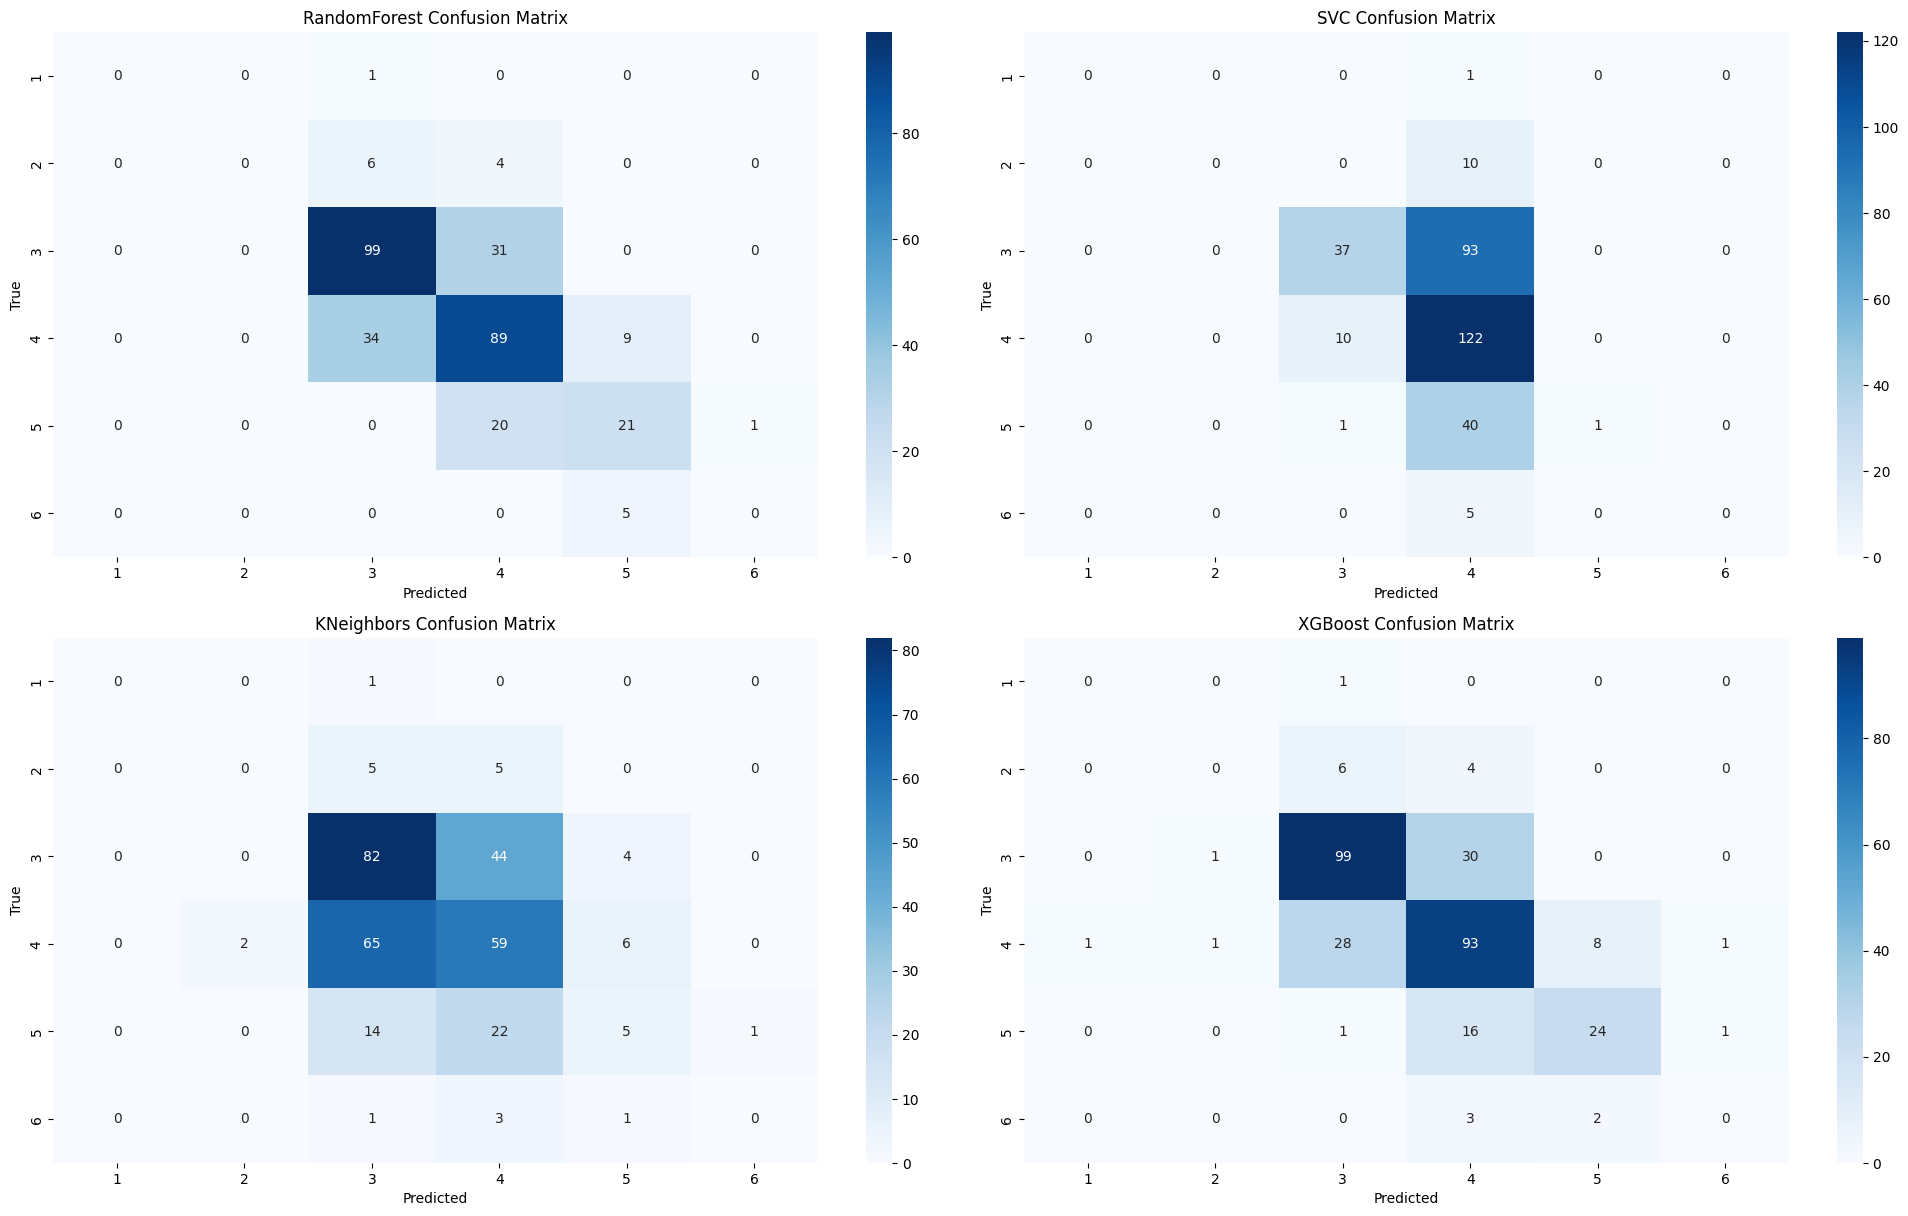

In [8]:
plt.figure(figsize=(20, 30))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ac = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[name] = {'accuracy score': ac, 'classification report': cr}
    plt.subplot(5, 2, i)
    cm = confusion_matrix(y_test,y_pred)
    plt.Figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["1","2","3","4","5","6"], yticklabels=["1","2","3","4","5","6"])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

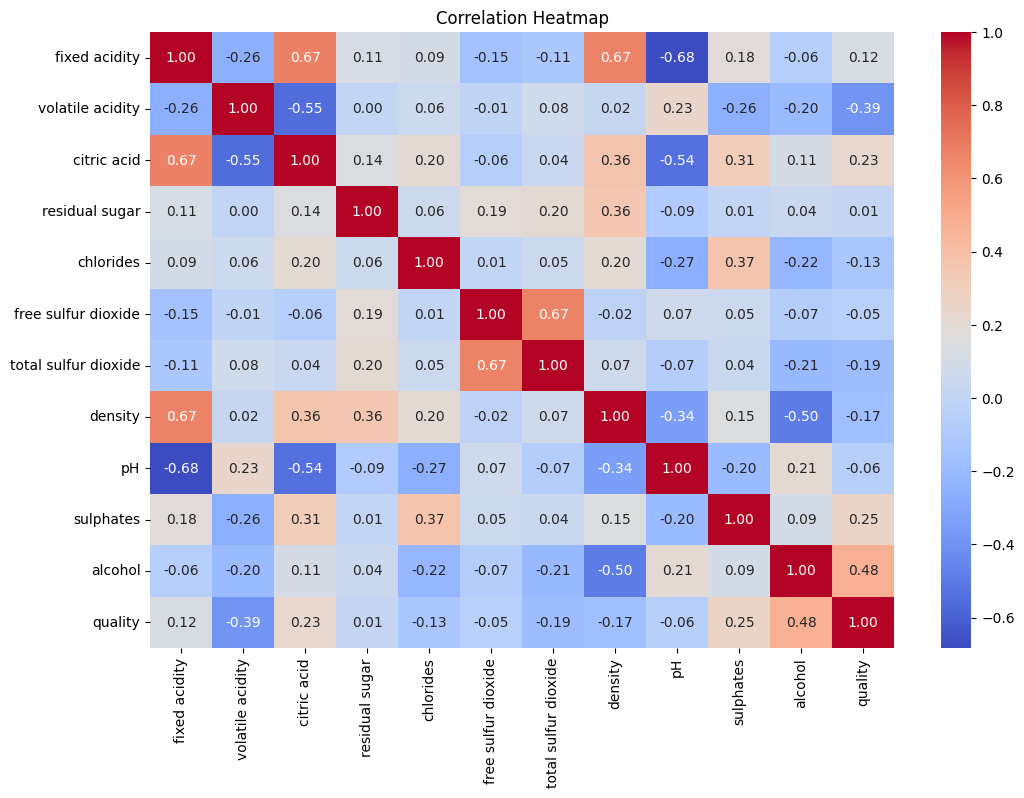

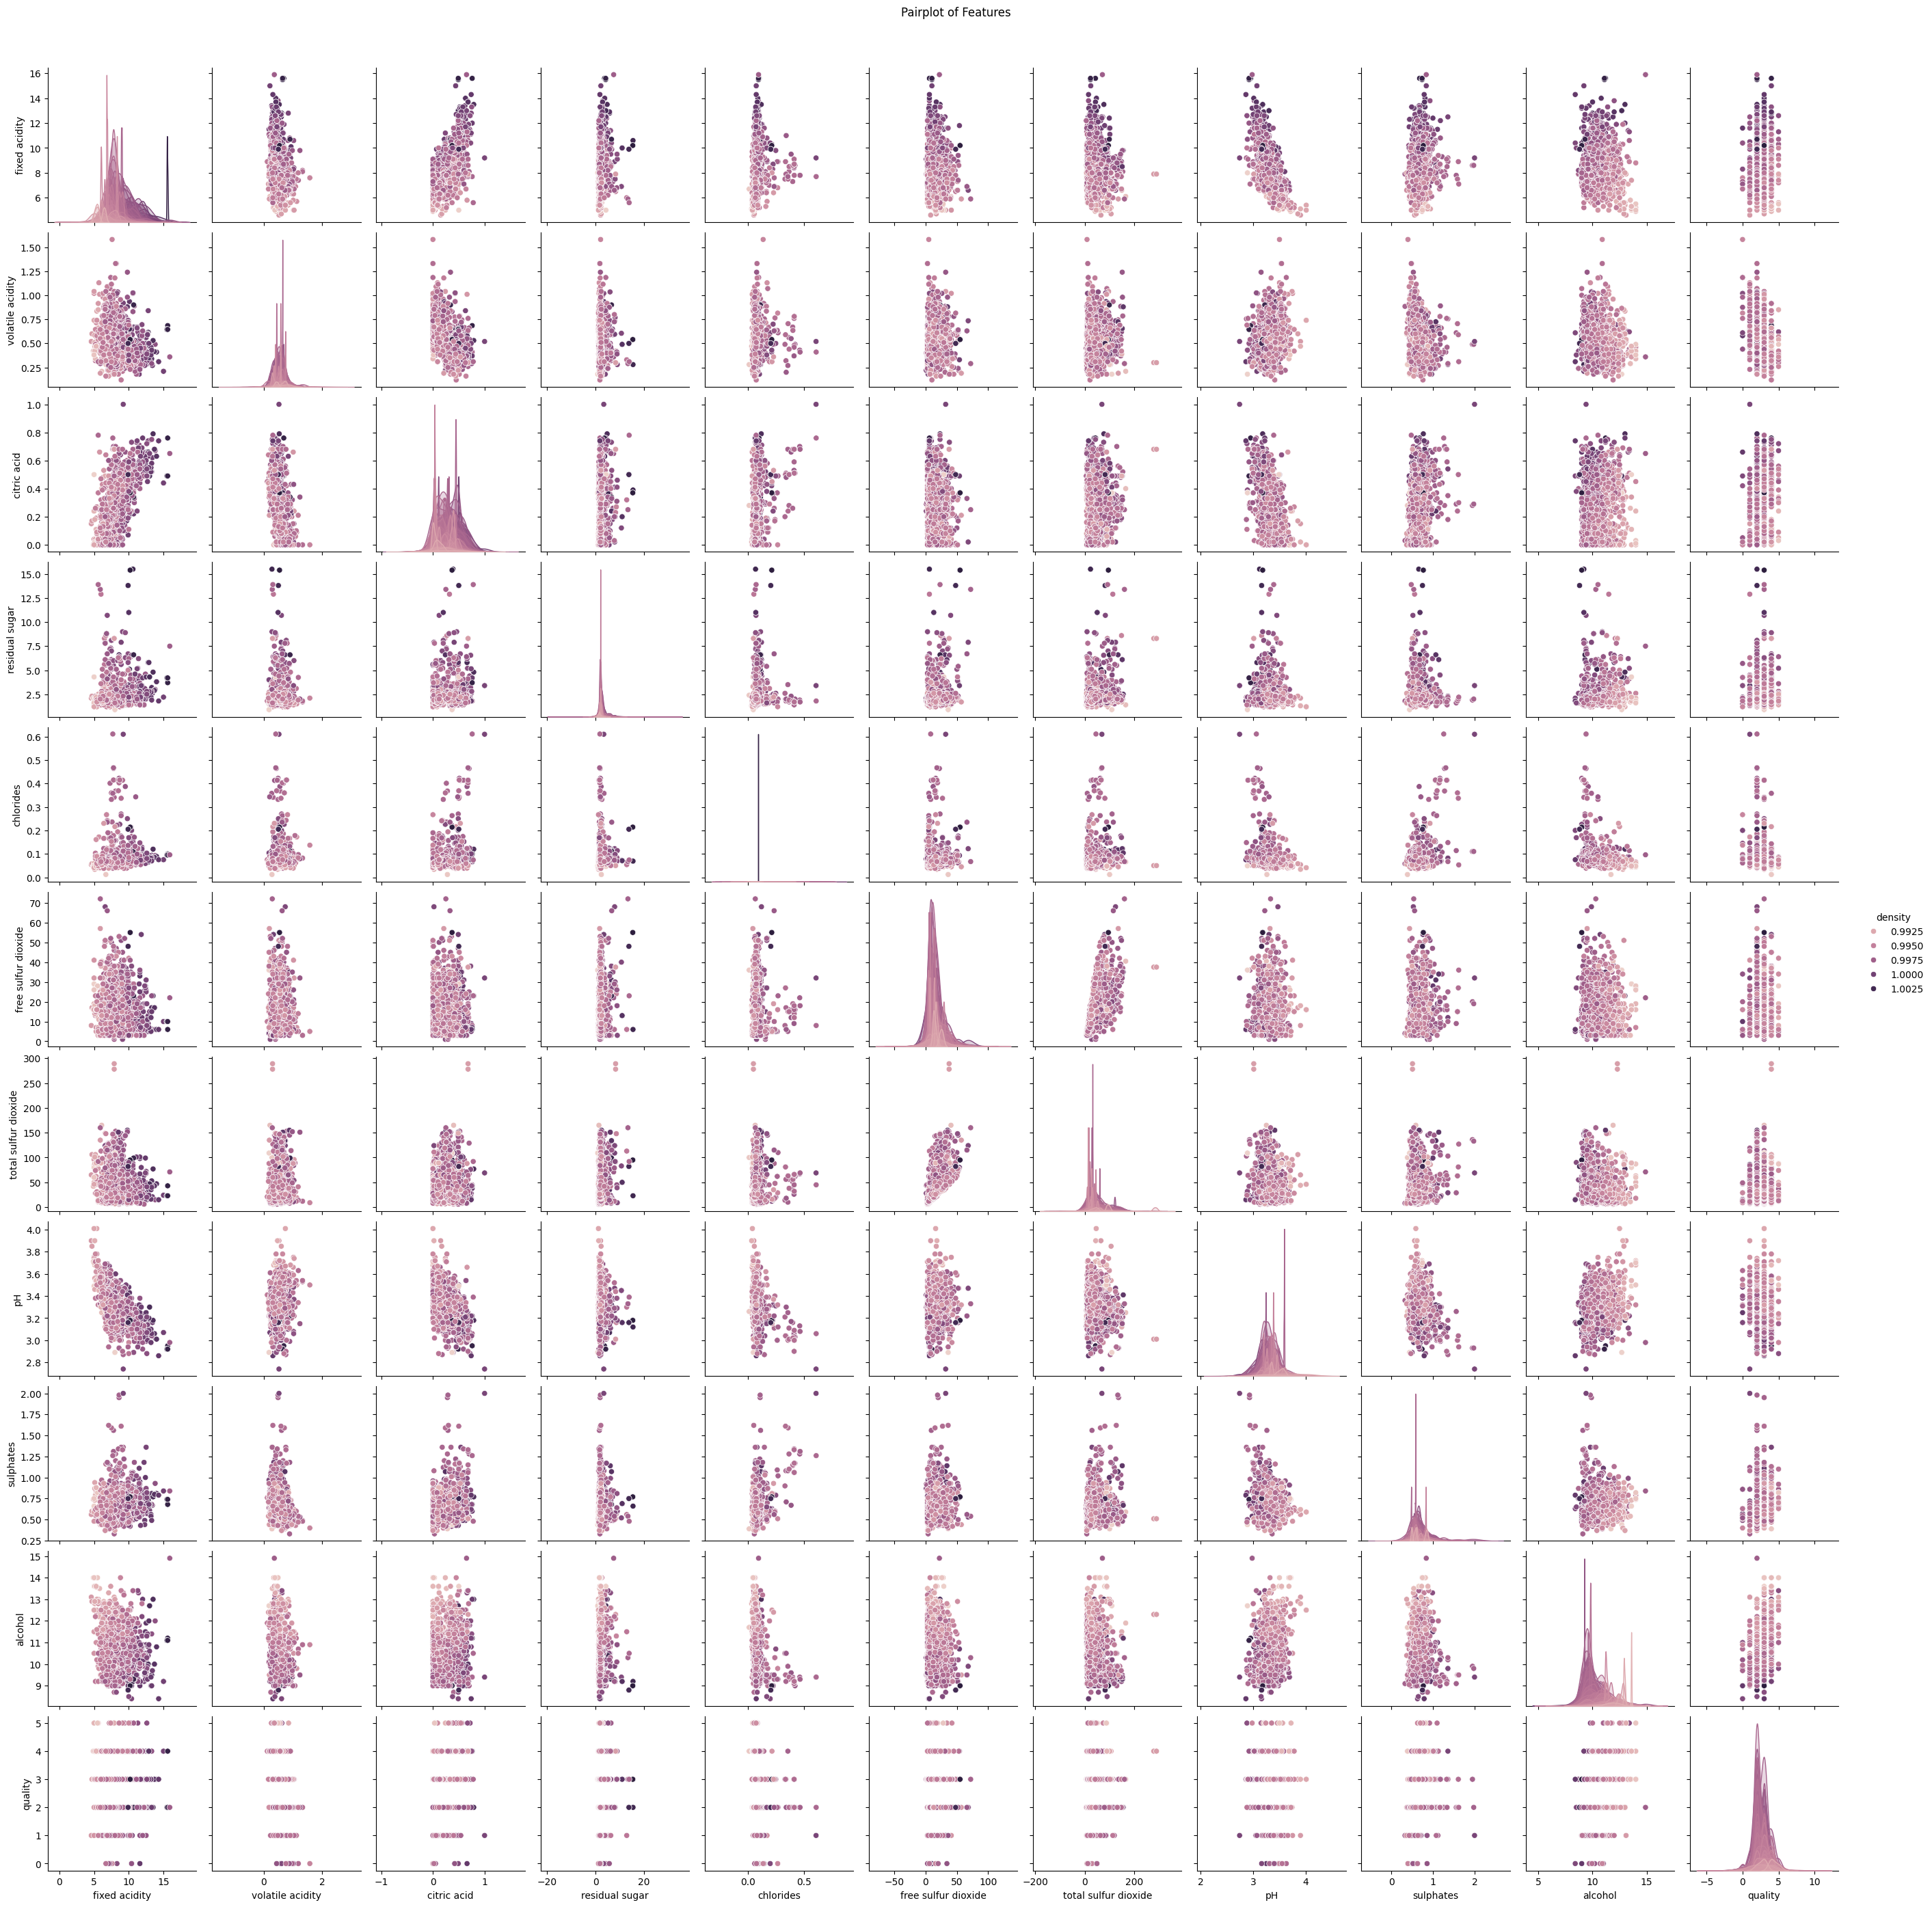

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde', hue='density')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [10]:
result_df = pd.DataFrame(results).T
print(result_df)

             accuracy score                              classification report
RandomForest       0.653125                precision    recall  f1-score   ...
SVC                     0.5                precision    recall  f1-score   ...
KNeighbors          0.45625                precision    recall  f1-score   ...
XGBoost               0.675                precision    recall  f1-score   ...
